In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

### Finding sticker using colorspace

In [2]:
fixed_frame = cv2.imread(r'..\img_test\frame_game_fixed.png')
moving_frame = cv2.imread(r'..\img_test\frame_game_moving.png')

In [3]:
def detect_sticker_by_color(image, lower_bound, upper_bound, sticker_color):
    # convert image to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    plt.figure(figsize=(6, 6))
    plt.title(f"HSV Image for color {sticker_color}")
    plt.imshow(hsv)
    plt.show()

    # create mask for sticker based on color bounds
    mask = cv2.inRange(hsv, lower_bound, upper_bound)
    plt.figure(figsize=(6, 6))
    plt.title(f"Mask for color {sticker_color}")
    plt.imshow(mask, cmap='gray')
    plt.show()

    # find contours of the sticker
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # draw bounding boxes around the detected stickers
    for contour in contours:
        if cv2.contourArea(contour) > 100:  # Threshold to remove noise
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(image, (x, y), (x + w, y + h), sticker_color, 2)

    return image, mask

In [4]:
# sticker color bounds in HSV (pink and blue)
pink_lower = np.array([140, 50, 100])  # Adjust HSV range for pink
pink_upper = np.array([170, 255, 255])
blue_lower = np.array([90, 100, 100])  # Adjust HSV range for blue
blue_upper = np.array([110, 255, 255])

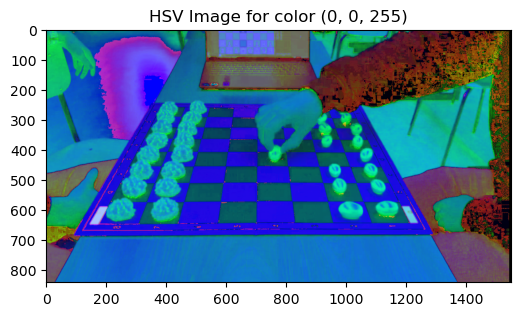

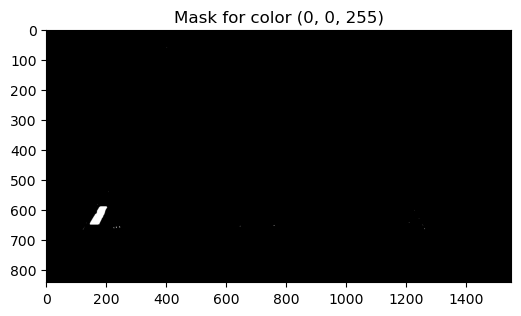

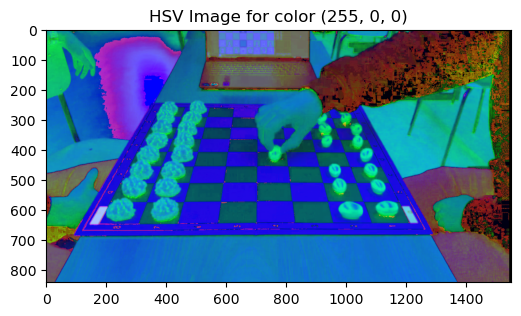

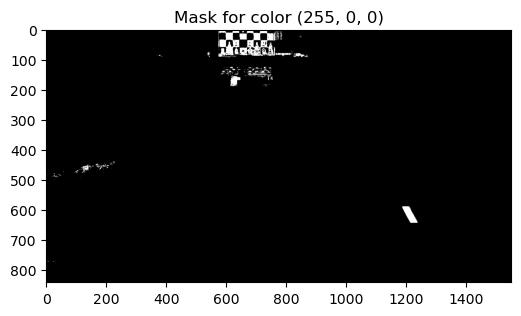

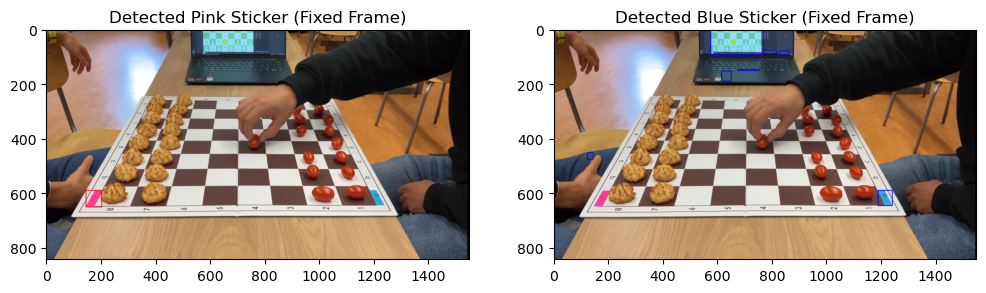

In [5]:
frame_pink = fixed_frame.copy()
frame_blue = fixed_frame.copy()

# detect the pink and blue stickers
detected_fixed_pink, pink_mask_fixed = detect_sticker_by_color(frame_pink, pink_lower, pink_upper, (0, 0, 255))
detected_fixed_blue, blue_mask_fixed = detect_sticker_by_color(frame_blue, blue_lower, blue_upper, (255, 0, 0))

# display the results for fixed frame
plt.figure(figsize=(12, 7))
plt.subplot(1, 2, 1)
plt.title("Detected Pink Sticker (Fixed Frame)")
plt.imshow(cv2.cvtColor(detected_fixed_pink, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.title("Detected Blue Sticker (Fixed Frame)")
plt.imshow(cv2.cvtColor(detected_fixed_blue, cv2.COLOR_BGR2RGB))
plt.show()

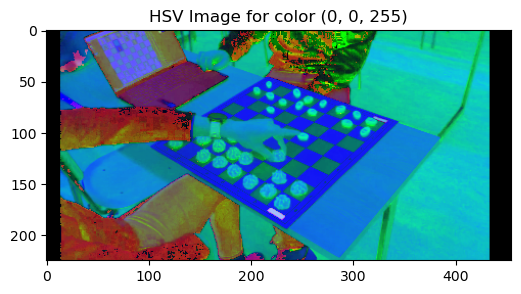

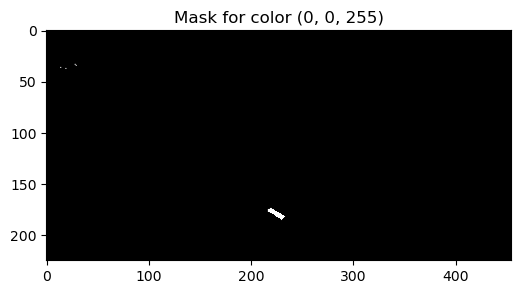

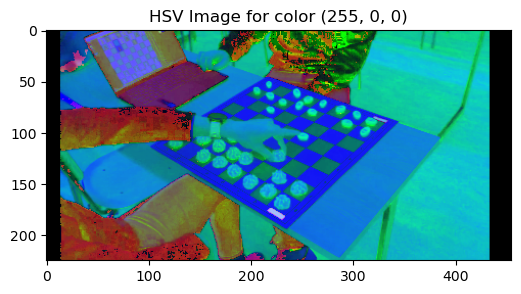

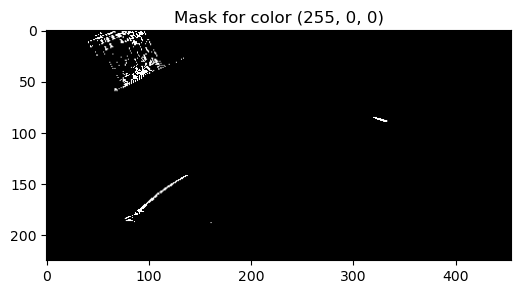

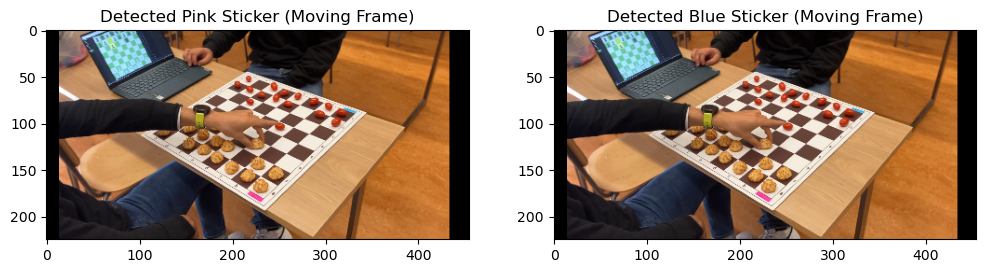

In [6]:
# Repeat the process for the moving frame
frame_pink = moving_frame.copy()
frame_blue = moving_frame.copy()

# detect the pink and blue stickers
detected_moving_pink, pink_mask_moving = detect_sticker_by_color(frame_pink, pink_lower, pink_upper, (0, 0, 255))
detected_moving_blue, blue_mask_moving = detect_sticker_by_color(frame_blue, blue_lower, blue_upper, (255, 0, 0))

# display the results for moving frame
plt.figure(figsize=(12, 7))
plt.subplot(1, 2, 1)
plt.title("Detected Pink Sticker (Moving Frame)")
plt.imshow(cv2.cvtColor(detected_moving_pink, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.title("Detected Blue Sticker (Moving Frame)")
plt.imshow(cv2.cvtColor(detected_moving_blue, cv2.COLOR_BGR2RGB))
plt.show()